In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Load the dataset from CSV
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
column_name = 'guestroom'
column_values = df[column_name]
print(column_values)

0       no
1       no
2       no
3       no
4      yes
      ... 
540     no
541     no
542     no
543     no
544     no
Name: guestroom, Length: 545, dtype: object


In [50]:
# Encoding Columns 
df.replace({'mainroad':{'yes':0,'no':1}},inplace=True) 
df.replace({'guestroom':{'yes':0,'no':1}},inplace=True) 
df.replace({'basement':{'yes':0,'no':1}},inplace=True) 
df.replace({'hotwaterheating':{'yes':0,'no':1}},inplace=True) 
df.replace({'airconditioning':{'yes':0,'no':1}},inplace=True) 
df.replace({'furnishingstatus':{'furnished':0,'semi-furnished':1,'unfurnished':2}},inplace=True) 
df.replace({'prefarea':{'yes':0,'no':1}},inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_14956\2461401088.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'mainroad':{'yes':0,'no':1}},inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_14956\2461401088.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'guestroom':{'yes':0,'no':1}},inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_14956\2461401088.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

In [51]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [59]:
df.shape

(545, 13)

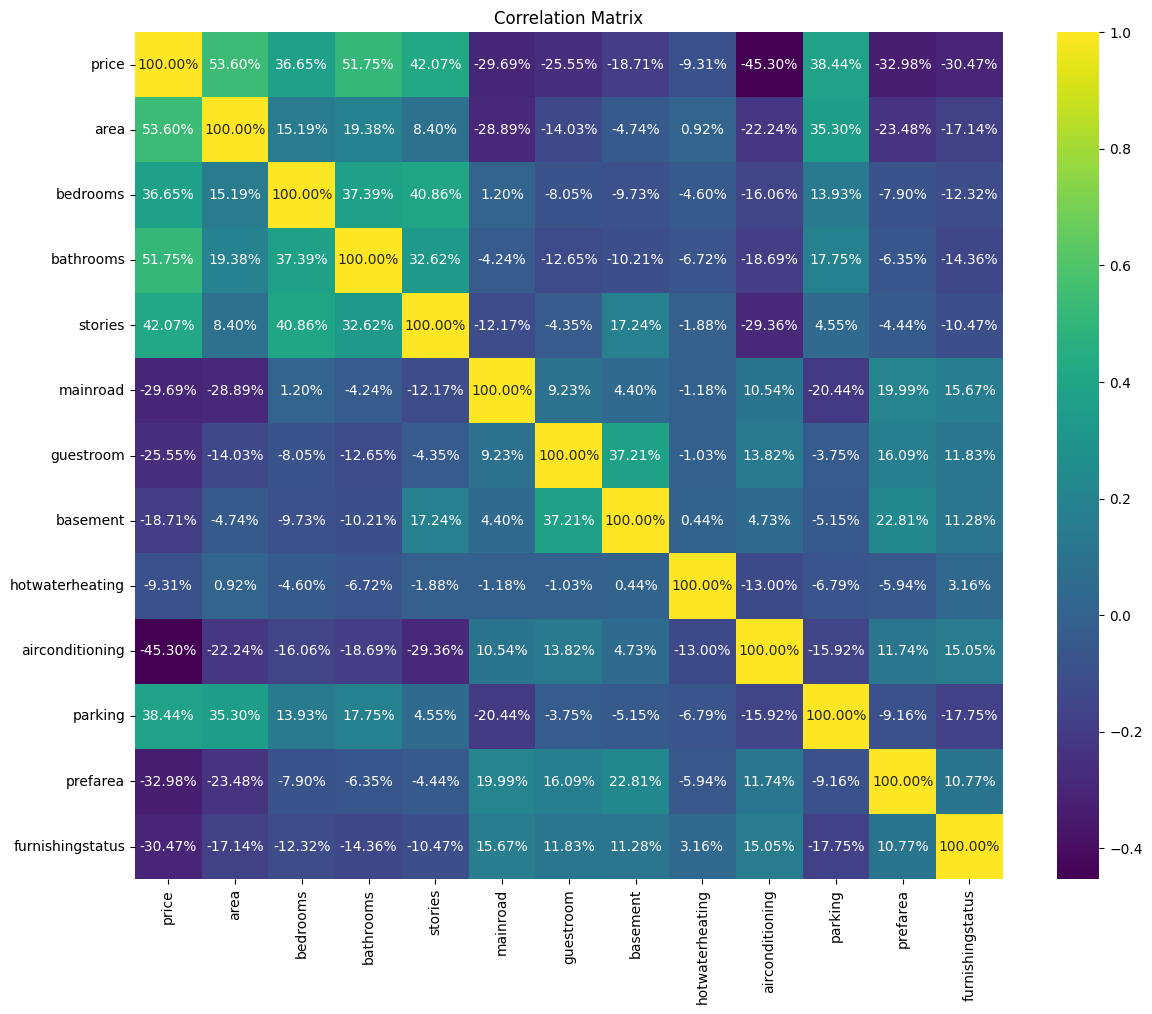

In [102]:
# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
plt.figure(figsize=(14, 11))
sns.heatmap(correlation_matrix, annot=True, fmt='.2%', cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Preprocessing: Selecting features and target variable
X = df[['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

In [81]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [82]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
519,4840,2,1,2,0,1,1,1,1,0,1,2
118,6420,3,1,1,0,1,0,1,0,0,0,0
407,2145,3,1,3,0,1,1,1,1,0,0,0
114,6800,2,1,1,0,0,0,1,1,2,1,0
515,3210,3,1,2,0,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,1,1,1,0,0,1,2
106,5450,4,2,1,0,1,0,1,0,0,0,1
270,4500,3,2,3,0,1,1,0,1,1,1,0
435,4040,2,1,1,0,1,1,1,1,0,1,2


In [83]:
# Building the Linear Regression Model
model = LinearRegression()

In [84]:
 # Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Model Evaluation
y_pred = model.predict(X_test)

In [86]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 1515504310932.5605


In [87]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.6734989021647662


In [88]:
# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1515504310932.5605
R-squared: 0.6734989021647662


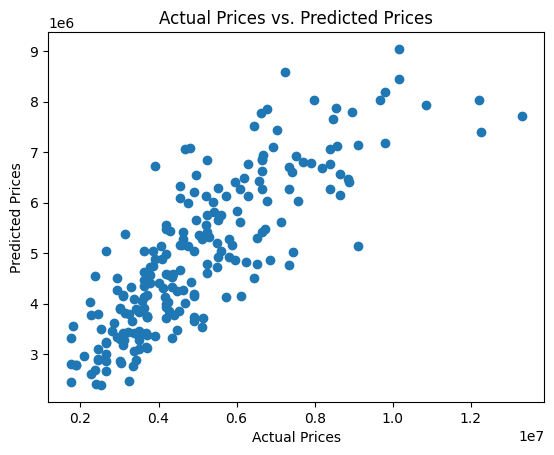

In [89]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

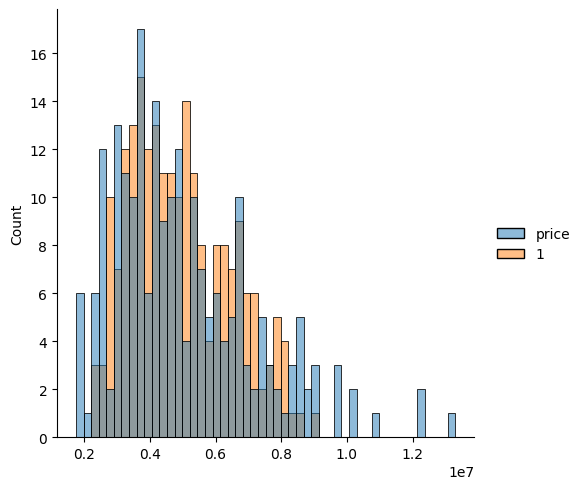

In [93]:
sns.displot((y_test, y_pred),bins=50)

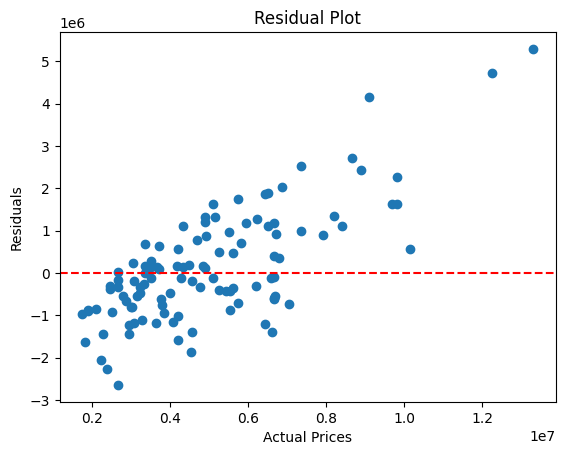

In [23]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [94]:
def predict_price(model, input_data):
    
    input_features = [input_data[col] for col in ['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking','prefarea','furnishingstatus']]
    price_prediction = model.predict([input_features])[0]

    return price_prediction

In [95]:
# Example input data
input_data = {
    'area': 1500,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'mainroad': 1,  # 1 or 0 indicating yes or no
    'guestroom': 0,  # 1 or 0 indicating yes or no
    'basement': 1,  # 1 or 0 indicating yes or no
    'hotwaterheating': 0,  # 1 or 0 indicating yes or no
    'airconditioning': 1,  # 1 or 0 indicating yes or no
    'parking': 1,
    'prefarea': 0,  # 1 or 0 indicating yes or no
    'furnishingstatus': 1  # 0, 1, or 2 depending on the category
}

# Example usage:
predicted_price = predict_price(model, input_data)
print("Predicted Price:", predicted_price)


Predicted Price: 5301413.638366733


C:\Users\priya\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
